In [70]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '523268a7-3bc9-435f-bb1b-9b5425ab166d',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-05-05T16:26:07.695Z', 'error_code': 0, 'error_message': None, 'elapsed': 38, 'credit_count': 1, 'notice': None, 'total_count': 9866}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11023, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [71]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11023,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19694390.00000,19694390.00000,False,NaN,1,NaN,NaN,None,2024-05-05T16:25:00.000Z,64388.99641,18798389475.24682,-24.88900,0.10749,1.27530,1.08948,-5.29263,-3.73387,51.35839,1268102007007.75464,53.38700,1352168924610.65991,None,2024-05-05T16:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-05 12:26:09.512014
1,1027,Ethereum,ETH,ethereum,8897,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120097745.02431,120097745.02431,True,NaN,2,NaN,NaN,None,2024-05-05T16:24:00.000Z,3154.93309,8979490998.27081,-4.89760,-0.17841,1.01531,-5.19916,-5.05386,-17.01817,37.65684,378900349742.95648,15.94890,378900349742.96002,None,2024-05-05T16:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-05 12:26:09.512014
2,825,Tether USDt,USDT,tether,84653,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,110901010765.94885,113086550461.49698,True,NaN,3,NaN,NaN,None,2024-05-05T16:24:00.000Z,1.00008,36658648876.95573,-18.34770,0.00874,-0.01433,0.04500,-0.02939,-0.05646,0.12664,110909407008.49284,4.66850,113095112169.81000,None,2024-05-05T16:24:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-05 12:26:09.512014
3,1839,BNB,BNB,bnb,2154,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147587396.74939,147587396.74939,False,NaN,4,NaN,NaN,None,2024-05-05T16:24:00.000Z,594.54363,546678454.45517,-13.45370,0.46515,0.70283,-1.66020,1.75159,40.88684,97.84484,87747145928.71716,3.69410,87747145928.72000,None,2024-05-05T16:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-05 12:26:09.512014
4,5426,Solana,SOL,solana,656,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,447442080.91679,575393120.83969,True,NaN,5,NaN,NaN,None,2024-05-05T16:24:00.000Z,147.15167,2526831572.22859,-15.98820,-0.28094,0.76769,3.46688,-16.07302,13.76006,53.80163,65841851371.81873,2.77140,84670061128.50999,None,2024-05-05T16:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-05 12:26:09.512014
5,3408,USDC,USDC,usd-coin,18875,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33608095619.35109,33608095619.35109,False,NaN,6,NaN,NaN,None,2024-05-05T16:24:00.000Z,1.00010,5061807732.62063,-16.37290,0.01096,0.00674,0.00525,0.02630,0.00355,0.00090,33611326901.22441,1.41480,33611326901.22000,None,2024-05-05T16:24:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-05 12:26:09.512014
6,52,XRP,XRP,xrp,1312,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55235913166.00000,99987652657.00000,False,NaN,7,NaN,NaN,None,2024-05-05T16:25:00.000Z,0.53266,560430853.91427,-30.01910,0.10746,-0.46244,2.32113,-8.52413,-11.79981,5.86663,29421874831.83620,1.23840,53265843081.86000,None,2024-05-05T16:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-05 12:26:09.512014
7,74,Dogecoin,DOGE,dogecoin,962,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144167726383.70520,144167726383.70520,True,NaN,8,NaN,NaN,None,2024-05-05T16:25:00.000Z,0.16180,1729592390.92966,-35.74520,0.26572,-0.65556,7.69036,-8.02156,-0.26556,105.87683,23325648364.22752,0.98180,23325648364.23000,None,2024-05-05T16:25:00.000Z,NaN,NaN,N

In [72]:
def api_runner():

    global df
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json
    import pandas as pd

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
    }
    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '523268a7-3bc9-435f-bb1b-9b5425ab166d',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index = True)

    if not os.path.isfile(r'C:\Users\ccurt\Downloads\Career\Education\Alex the Analyst Bootcamp\Python\API.csv'):
        df.to_csv(r'C:\Users\ccurt\Downloads\Career\Education\Alex the Analyst Bootcamp\Python\API.csv', header='column_names')
    else:
         df.to_csv(r'C:\Users\ccurt\Downloads\Career\Education\Alex the Analyst Bootcamp\Python\API.csv', mode='a', header=False)

    

In [73]:
def api_runner():

    global df
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json
    import pandas as pd

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
    }
    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '523268a7-3bc9-435f-bb1b-9b5425ab166d',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\ccurt\Downloads\Career\Education\Alex the Analyst Bootcamp\Python\API.csv'):
        df.to_csv(r'C:\Users\ccurt\Downloads\Career\Education\Alex the Analyst Bootcamp\Python\API.csv', header='column_names')
    else:
         df.to_csv(r'C:\Users\ccurt\Downloads\Career\Education\Alex the Analyst Bootcamp\Python\API.csv', mode='a',header=False)

    

In [74]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API_Runner completed successfully')
    sleep(60) #sleep for 1 min
exit()

API_Runner completed successfully


KeyboardInterrupt: 

In [126]:
read_me = pd.read_csv(r'C:\Users\ccurt\Downloads\Career\Education\Alex the Analyst Bootcamp\Python\API.csv')
read_me

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11023,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19693590.00000,19693590.00000,False,NaN,1,NaN,NaN,NaN,2024-05-03T21:21:00.000Z,62705.20038,32655524783.97065,-2.69810,0.29731,6.39418,-1.80727,-4.50473,-6.60755,45.58618,1234890507201.25220,53.17820,1316809208032.97998,NaN,2024-05-03T21:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-03 17:21:37.009604
1,1,1027,Ethereum,ETH,ethereum,8892,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120094013.28348,120094013.28348,True,NaN,2,NaN,NaN,NaN,2024-05-03T21:20:00.000Z,3107.98893,12885718063.59069,-4.48360,0.57984,3.74439,-1.09645,-5.82494,-12.93493,34.92253,373250863750.63696,16.04700,373250863750.64001,NaN,2024-05-03T21:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-03 17:21:37.009604
2,2,825,Tether USDt,USDT,tether,84617,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,110605184324.02869,113086550461.51680,True,NaN,3,NaN,NaN,NaN,2024-05-03T21:20:00.000Z,1.00098,53340454816.06866,-4.45810,0.05135,0.06029,0.12138,0.06667,-0.06629,0.11984,110714056158.95244,4.75990,113197864775.84000,NaN,2024-05-03T21:20:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-03 17:21:37.009604
3,3,1839,BNB,BNB,bnb,2154,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147587530.31977,147587530.31977,False,NaN,4,NaN,NaN,NaN,2024-05-03T21:20:00.000Z,585.59767,853307907.61407,-5.98810,0.19960,4.43304,-2.66066,5.71837,40.77646,95.07044,86426914531.82663,3.71570,86426914531.83000,NaN,2024-05-03T21:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-03 17:21:37.009604
4,4,5426,Solana,SOL,solana,656,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,447330065.40474,575233691.59425,True,NaN,5,NaN,NaN,NaN,2024-05-03T21:20:00.000Z,143.56458,3264303320.11579,-4.74250,-0.00956,4.72966,0.80971,-21.36021,11.20356,46.25069,64220752677.77680,2.76100,82583182971.11000,NaN,2024-05-03T21:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-03 17:21:37.009604
5,5,3408,USDC,USDC,usd-coin,18855,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,33300748755.64668,33300748755.64668,False,NaN,6,NaN,NaN,NaN,2024-05-03T21:20:00.000Z,1.00035,7078854405.86078,-4.14250,0.03302,0.00656,0.01979,0.04754,0.04241,0.01540,33312503735.76593,1.43220,33312503735.77000,NaN,2024-05-03T21:20:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-03 17:21:37.009604
6,6,52,XRP,XRP,xrp,1310,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55235913166.00000,99987652657.00000,False,NaN,7,NaN,NaN,NaN,2024-05-03T21:21:00.000Z,0.53304,1121007741.10017,-2.37220,0.26141,2.12995,0.82582,-6.27429,-17.90687,2.63694,29443068941.00620,1.26580,53304213243.51000,NaN,2024-05-03T21:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-03 17:21:37.009604
7,7,74,Dogecoin,DOGE,dogecoin,959,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,144142426383.70520,144142426383.70520,True,NaN,8,NaN,NaN,NaN,2024-05-03T21:21:00.000Z,0.14414,1192541423.14971,-11.70770,1.80537,9.10191,-3.35923,-15.53872,-17.00790,82.08230,20777336020.24943,0.89460,20777336020.25000,NaN,2024-05-03T21:21:00.000Z,NaN,

In [76]:
pd.set_option('display.float_format',lambda x: '%.5f' % x)

In [125]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11023,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19694390.00000,19694390.00000,False,NaN,1,NaN,NaN,None,2024-05-05T16:25:00.000Z,64388.99641,18798389475.24682,-24.88900,0.10749,1.27530,1.08948,-5.29263,-3.73387,51.35839,1268102007007.75464,53.38700,1352168924610.65991,None,2024-05-05T16:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-05 12:26:11.510628
1,1027,Ethereum,ETH,ethereum,8897,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120097745.02431,120097745.02431,True,NaN,2,NaN,NaN,None,2024-05-05T16:24:00.000Z,3154.93309,8979490998.27081,-4.89760,-0.17841,1.01531,-5.19916,-5.05386,-17.01817,37.65684,378900349742.95648,15.94890,378900349742.96002,None,2024-05-05T16:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-05 12:26:11.510628
2,825,Tether USDt,USDT,tether,84653,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,110901010765.94885,113086550461.49698,True,NaN,3,NaN,NaN,None,2024-05-05T16:24:00.000Z,1.00008,36658648876.95573,-18.34770,0.00874,-0.01433,0.04500,-0.02939,-0.05646,0.12664,110909407008.49284,4.66850,113095112169.81000,None,2024-05-05T16:24:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-05 12:26:11.510628
3,1839,BNB,BNB,bnb,2154,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147587396.74939,147587396.74939,False,NaN,4,NaN,NaN,None,2024-05-05T16:24:00.000Z,594.54363,546678454.45517,-13.45370,0.46515,0.70283,-1.66020,1.75159,40.88684,97.84484,87747145928.71716,3.69410,87747145928.72000,None,2024-05-05T16:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-05 12:26:11.510628
4,5426,Solana,SOL,solana,656,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,447442080.91679,575393120.83969,True,NaN,5,NaN,NaN,None,2024-05-05T16:24:00.000Z,147.15167,2526831572.22859,-15.98820,-0.28094,0.76769,3.46688,-16.07302,13.76006,53.80163,65841851371.81873,2.77140,84670061128.50999,None,2024-05-05T16:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-05 12:26:11.510628
5,3408,USDC,USDC,usd-coin,18875,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33608095619.35109,33608095619.35109,False,NaN,6,NaN,NaN,None,2024-05-05T16:24:00.000Z,1.00010,5061807732.62063,-16.37290,0.01096,0.00674,0.00525,0.02630,0.00355,0.00090,33611326901.22441,1.41480,33611326901.22000,None,2024-05-05T16:24:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-05 12:26:11.510628
6,52,XRP,XRP,xrp,1312,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55235913166.00000,99987652657.00000,False,NaN,7,NaN,NaN,None,2024-05-05T16:25:00.000Z,0.53266,560430853.91427,-30.01910,0.10746,-0.46244,2.32113,-8.52413,-11.79981,5.86663,29421874831.83620,1.23840,53265843081.86000,None,2024-05-05T16:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-05 12:26:11.510628
7,74,Dogecoin,DOGE,dogecoin,962,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144167726383.70520,144167726383.70520,True,NaN,8,NaN,NaN,None,2024-05-05T16:25:00.000Z,0.16180,1729592390.92966,-35.74520,0.26572,-0.65556,7.69036,-8.02156,-0.26556,105.87683,23325648364.22752,0.98180,23325648364.23000,None,2024-05-05T16:25:00.000Z,NaN,NaN,N

In [128]:
df = read_me

df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11023,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19693590.00000,19693590.00000,False,NaN,1,NaN,NaN,NaN,2024-05-03T21:21:00.000Z,62705.20038,32655524783.97065,-2.69810,0.29731,6.39418,-1.80727,-4.50473,-6.60755,45.58618,1234890507201.25220,53.17820,1316809208032.97998,NaN,2024-05-03T21:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-03 17:21:37.009604
1,1,1027,Ethereum,ETH,ethereum,8892,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120094013.28348,120094013.28348,True,NaN,2,NaN,NaN,NaN,2024-05-03T21:20:00.000Z,3107.98893,12885718063.59069,-4.48360,0.57984,3.74439,-1.09645,-5.82494,-12.93493,34.92253,373250863750.63696,16.04700,373250863750.64001,NaN,2024-05-03T21:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-03 17:21:37.009604
2,2,825,Tether USDt,USDT,tether,84617,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,110605184324.02869,113086550461.51680,True,NaN,3,NaN,NaN,NaN,2024-05-03T21:20:00.000Z,1.00098,53340454816.06866,-4.45810,0.05135,0.06029,0.12138,0.06667,-0.06629,0.11984,110714056158.95244,4.75990,113197864775.84000,NaN,2024-05-03T21:20:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-03 17:21:37.009604
3,3,1839,BNB,BNB,bnb,2154,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147587530.31977,147587530.31977,False,NaN,4,NaN,NaN,NaN,2024-05-03T21:20:00.000Z,585.59767,853307907.61407,-5.98810,0.19960,4.43304,-2.66066,5.71837,40.77646,95.07044,86426914531.82663,3.71570,86426914531.83000,NaN,2024-05-03T21:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-03 17:21:37.009604
4,4,5426,Solana,SOL,solana,656,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,447330065.40474,575233691.59425,True,NaN,5,NaN,NaN,NaN,2024-05-03T21:20:00.000Z,143.56458,3264303320.11579,-4.74250,-0.00956,4.72966,0.80971,-21.36021,11.20356,46.25069,64220752677.77680,2.76100,82583182971.11000,NaN,2024-05-03T21:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-03 17:21:37.009604
5,5,3408,USDC,USDC,usd-coin,18855,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,33300748755.64668,33300748755.64668,False,NaN,6,NaN,NaN,NaN,2024-05-03T21:20:00.000Z,1.00035,7078854405.86078,-4.14250,0.03302,0.00656,0.01979,0.04754,0.04241,0.01540,33312503735.76593,1.43220,33312503735.77000,NaN,2024-05-03T21:20:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-03 17:21:37.009604
6,6,52,XRP,XRP,xrp,1310,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55235913166.00000,99987652657.00000,False,NaN,7,NaN,NaN,NaN,2024-05-03T21:21:00.000Z,0.53304,1121007741.10017,-2.37220,0.26141,2.12995,0.82582,-6.27429,-17.90687,2.63694,29443068941.00620,1.26580,53304213243.51000,NaN,2024-05-03T21:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-03 17:21:37.009604
7,7,74,Dogecoin,DOGE,dogecoin,959,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,144142426383.70520,144142426383.70520,True,NaN,8,NaN,NaN,NaN,2024-05-03T21:21:00.000Z,0.14414,1192541423.14971,-11.70770,1.80537,9.10191,-3.35923,-15.53872,-17.00790,82.08230,20777336020.24943,0.89460,20777336020.25000,NaN,2024-05-03T21:21:00.000Z,NaN,

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   id                                  15 non-null     int64         
 1   name                                15 non-null     object        
 2   symbol                              15 non-null     object        
 3   slug                                15 non-null     object        
 4   num_market_pairs                    15 non-null     int64         
 5   date_added                          15 non-null     object        
 6   tags                                15 non-null     object        
 7   max_supply                          5 non-null      float64       
 8   circulating_supply                  15 non-null     float64       
 9   total_supply                        15 non-null     float64       
 10  infinite_supply             

In [94]:
group_by1 = df.groupby('name', sort=False)[df.columns[19:26]].mean()
group_by1

,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,,
Bitcoin,-24.88900,0.10749,1.27530,1.08948,-5.29263,-3.73387,51.35839
Ethereum,-4.89760,-0.17841,1.01531,-5.19916,-5.05386,-17.01817,37.65684
Tether USDt,-18.34770,0.00874,-0.01433,0.04500,-0.02939,-0.05646,0.12664
BNB,-13.45370,0.46515,0.70283,-1.66020,1.75159,40.88684,97.84484
Solana,-15.98820,-0.28094,0.76769,3.46688,-16.07302,13.76006,53.80163
USDC,-16.37290,0.01096,0.00674,0.00525,0.02630,0.00355,0.00090
XRP,-30.01910,0.10746,-0.46244,2.32113,-8.52413,-11.79981,5.86663
Dogecoin,-35.74520,0.26572,-0.65556,7.69036,-8.02156,-0.26556,105.87683
Toncoin,-33.21030,0.28222,3.38472,7.47476,10.42517,119.67988,188.84848


In [95]:
stacking = group_by1.stack()
stacking

name                                      
Bitcoin       quote.USD.volume_change_24h    -24.88900
              quote.USD.percent_change_1h      0.10749
              quote.USD.percent_change_24h     1.27530
              quote.USD.percent_change_7d      1.08948
              quote.USD.percent_change_30d    -5.29263
                                                ...   
Bitcoin Cash  quote.USD.percent_change_24h     1.39350
              quote.USD.percent_change_7d     -1.73483
              quote.USD.percent_change_30d   -29.11621
              quote.USD.percent_change_60d    15.73381
              quote.USD.percent_change_90d   100.79946
Length: 105, dtype: float64

In [96]:
df3 = stacking.to_frame(name='values')

df3

values
name                                               
Bitcoin      quote.USD.volume_change_24h  -24.88900
             quote.USD.percent_change_1h    0.10749
             quote.USD.percent_change_24h   1.27530
             quote.USD.percent_change_7d    1.08948
             quote.USD.percent_change_30d  -5.29263
...                                             ...
Bitcoin Cash quote.USD.percent_change_24h   1.39350
             quote.USD.percent_change_7d   -1.73483
             quote.USD.percent_change_30d -29.11621
             quote.USD.percent_change_60d  15.73381
             quote.USD.percent_change_90d 100.79946

[105 rows x 1 columns]

In [97]:
df3.count()

values    105
dtype: int64

In [98]:
index = pd.Index(range(105))

df4 = df3.set_index(index)
df4 = df3.reset_index()
df4

,name,level_1,values
0,Bitcoin,quote.USD.volume_change_24h,-24.88900
1,Bitcoin,quote.USD.percent_change_1h,0.10749
2,Bitcoin,quote.USD.percent_change_24h,1.27530
3,Bitcoin,quote.USD.percent_change_7d,1.08948
4,Bitcoin,quote.USD.percent_change_30d,-5.29263
...,...,...,...
100,Bitcoin Cash,quote.USD.percent_change_24h,1.39350
101,Bitcoin Cash,quote.USD.percent_change_7d,-1.73483
102,Bitcoin Cash,quote.USD.percent_change_30d,-29.11621
103,Bitcoin Cash,quote.USD.percent_change_60d,15.73381


In [99]:
df5 = df4.rename(columns={'level_1': 'percent_change'})
df5

,name,percent_change,values
0,Bitcoin,quote.USD.volume_change_24h,-24.88900
1,Bitcoin,quote.USD.percent_change_1h,0.10749
2,Bitcoin,quote.USD.percent_change_24h,1.27530
3,Bitcoin,quote.USD.percent_change_7d,1.08948
4,Bitcoin,quote.USD.percent_change_30d,-5.29263
...,...,...,...
100,Bitcoin Cash,quote.USD.percent_change_24h,1.39350
101,Bitcoin Cash,quote.USD.percent_change_7d,-1.73483
102,Bitcoin Cash,quote.USD.percent_change_30d,-29.11621
103,Bitcoin Cash,quote.USD.percent_change_60d,15.73381


In [113]:
df5['percent_change'] = df5['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])

In [118]:
pd.set_option('display.max_rows', 105)

df5.loc[df5['percent_change'].str.contains('24h'), 'percent_change'] = '24h'

df5



,name,percent_change,values
0,Bitcoin,24h,-24.88900
1,Bitcoin,1h,0.10749
2,Bitcoin,24h,1.27530
3,Bitcoin,7d,1.08948
4,Bitcoin,30d,-5.29263
5,Bitcoin,60d,-3.73387
6,Bitcoin,90d,51.35839
7,Ethereum,24h,-4.89760
8,Ethereum,1h,-0.17841
9,Ethereum,24h,1.01531


In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

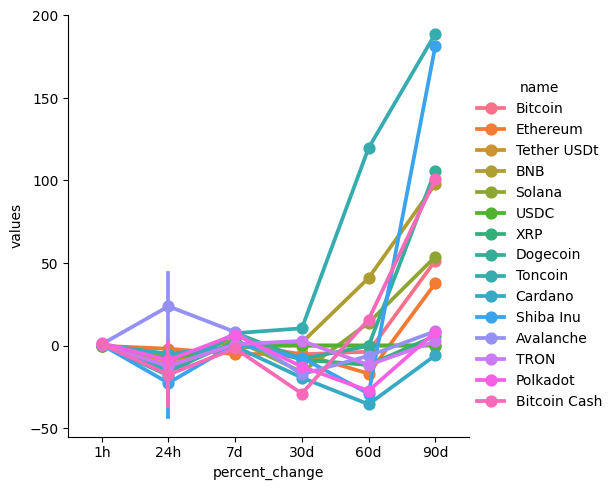

In [120]:
change_order = ['1h', '24h', '7d', '30d', '60d', '90d']
sns.catplot(x='percent_change', y='values', hue='name', data=df5, kind='point', order = change_order)
plt.show()


In [132]:
df6 = df[['name', 'quote.USD.price','timestamp']]
df7 = df6.query("name == 'Bitcoin'")
df7['timestamp'] = pd.to_datetime(df7['timestamp'])
df10['timestamp'] = df7['timestamp'].dt.strftime('%m/%d/%Y')
df10

C:\Users\ccurt\AppData\Local\Temp\ipykernel_13000\778553642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['timestamp'] = pd.to_datetime(df7['timestamp'])


,name,quote.USD.price,timestamp
0,Bitcoin,62705.20038,05/03/2024
15,Bitcoin,62755.34744,05/03/2024
30,Bitcoin,62709.99715,05/03/2024
45,Bitcoin,64388.99641,05/05/2024


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

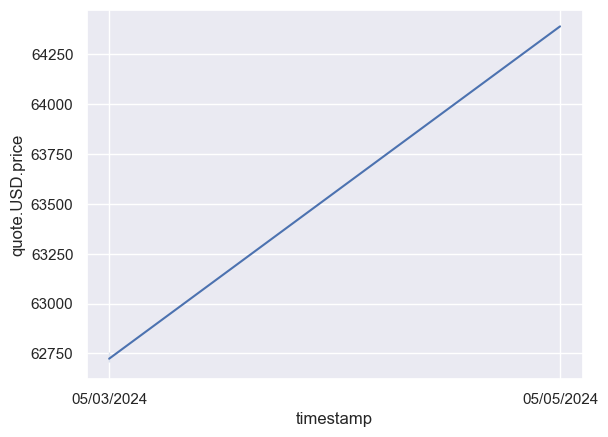

In [134]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)